<a href="https://colab.research.google.com/github/RenatoCosta10031979/AnaliseExploratoriaPETR4/blob/main/Plotagem_Cota%C3%A7%C3%A3o_Financeira_PETR4__API_Alpha_Vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Investigando a Desvalorização da PETR4: Análise Exploratória das Cotações de 2010 a 2016**

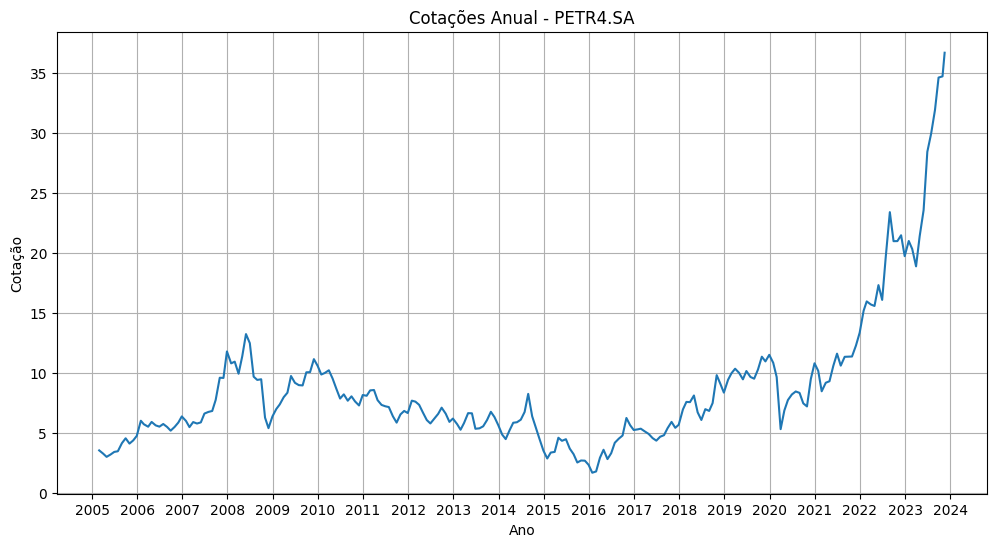

In [1]:
#importação
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import YearLocator

def obter_cotacoes_mensais(symbol, apikey):
    base_url = "https://www.alphavantage.co/query"
    function = "TIME_SERIES_MONTHLY_ADJUSTED"

    parametros = {
        'function': function,
        'symbol': symbol,
        'apikey': apikey
    }

    # Faz a requisição à API
    response = requests.get(base_url, params=parametros)
    data = response.json()

    # Verifica se a resposta contém dados válidos
    if 'Monthly Adjusted Time Series' not in data:
        print("Erro ao obter dados mensais.")
        return None

    # Obtém os dados mensais
    time_series = data['Monthly Adjusted Time Series']

    # Extrai as datas e cotações
    datas_cotacoes = [(data, float(dados['5. adjusted close'])) for data, dados in time_series.items()]

    # Cria um DataFrame pandas
    df = pd.DataFrame(datas_cotacoes, columns=['Data', 'Cotação'])

    # Converte a coluna 'Data' para formato de data
    df['Data'] = pd.to_datetime(df['Data'])

    # Define os anos que serão exibidos no eixo x
    anos = range(df['Data'].min().year, df['Data'].max().year + 1)

    # Plota o gráfico usando Seaborn e Matplotlib
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='Data', y='Cotação', data=df)
    plt.title(f'Cotações Anual - {symbol}')
    plt.xlabel('Ano')
    plt.ylabel('Cotação')

    # Define o espaçamento manualmente no eixo x
    anos_locator = YearLocator()
    ax.xaxis.set_major_locator(anos_locator)

    plt.grid(True)
    plt.show()

# Substitua 'YOUR_API_KEY' pela sua chave de API
apikey = 'XS7IGZOWSWU05E2S'
symbol = 'PETR4.SA'

# Obtém as cotações mensais
obter_cotacoes_mensais(symbol, apikey)
